In [33]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten

In [15]:
train_dir = '/content/drive/MyDrive/Indian-Currency-Classifier-master/indian_currency_new/training'
validation_dir = '/content/drive/MyDrive/Indian-Currency-Classifier-master/indian_currency_new/validation'

In [6]:
train_10_dir = os.path.join(train_dir, '10')
train_100_dir = os.path.join(train_dir, '100')
train_20_dir = os.path.join(train_dir, '20')
train_200_dir = os.path.join(train_dir, '200')
train_2000_dir = os.path.join(train_dir, '2000')
train_50_dir = os.path.join(train_dir, '50')
train_500_dir = os.path.join(train_dir, '500')

In [7]:
validation_10_dir = os.path.join(validation_dir, '10')
validation_100_dir = os.path.join(validation_dir, '100')
validation_20_dir = os.path.join(validation_dir, '20')
validation_200_dir = os.path.join(validation_dir, '200')
validation_2000_dir = os.path.join(validation_dir, '2000')
validation_50_dir = os.path.join(validation_dir, '50')
validation_500_dir = os.path.join(validation_dir, '500')

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=1,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 584 images belonging to 7 classes.


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=1,
        class_mode='categorical')

Found 167 images belonging to 7 classes.


In [22]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=584,  # images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      validation_steps=167,  # images = batch_size * steps
      verbose=1)

Epoch 1/20
  5/584 [..............................] - ETA: 9s - loss: 0.9949 - accuracy: 0.4000 

<ipython-input-22-bb087c5cac9c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


584/584 [==============================] - 24s 42ms/step - loss: 1.1508 - accuracy: 0.5908 - val_loss: 1.3247 - val_accuracy: 0.7305
Epoch 2/20
584/584 [==============================] - 25s 42ms/step - loss: 0.6957 - accuracy: 0.7688 - val_loss: 1.0482 - val_accuracy: 0.8443
Epoch 3/20
584/584 [==============================] - 25s 42ms/step - loss: 0.3129 - accuracy: 0.9058 - val_loss: 1.1015 - val_accuracy: 0.8862
Epoch 4/20
584/584 [==============================] - 25s 42ms/step - loss: 0.2547 - accuracy: 0.9332 - val_loss: 1.3868 - val_accuracy: 0.8982
Epoch 5/20
584/584 [==============================] - 24s 41ms/step - loss: 0.2356 - accuracy: 0.9384 - val_loss: 1.6050 - val_accuracy: 0.8922
Epoch 6/20
584/584 [==============================] - 26s 45ms/step - loss: 0.1564 - accuracy: 0.9760 - val_loss: 1.3898 - val_accuracy: 0.9102
Epoch 7/20
584/584 [==============================] - 24s 42ms/step - loss: 0.0810 - accuracy: 0.9846 - val_loss: 1.2794 - val_accuracy: 0.9162
Epo

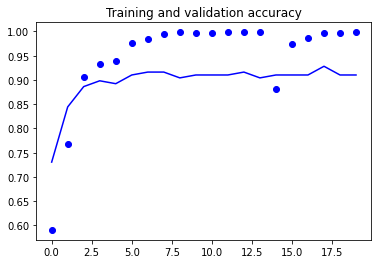

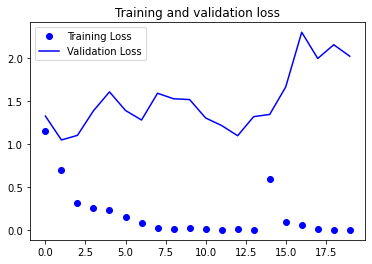

In [72]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [76]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img =load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0] == 1:
    print("10")
  if classes[0][1] == 1:
    print("100")
  if classes[0][2] == 1:
    print("20")
  if classes[0][3] == 1:
    print("200")
  if classes[0][4] == 1:
    print("2000")
  if classes[0][5] == 1:
    print("50")
  if classes[0][6] == 1:
    print("500")

Saving 44.jpg to 44.jpg
1/1 [==============================] - 0s 15ms/step
44.jpg
20
